<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA-SCIENCE-NA-PR-TICA/blob/master/MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning

In [0]:
#Importar os pacotes necessários. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Configurar o notebook.
sns.set_style()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("/content/drive/My Drive/DataFrames/housing_prices.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
#Conjunto de teste geralmente é em torno de 20%/30% do conjunto total, cada caso é um caso, é preciso avaliar.

#Como dividir o conjuto de dados.
! pip install sklearn
from sklearn.model_selection import train_test_split


In [0]:
#Variável alvo neste caso é o sale privce. 
#eliminar a coluna axis=1 SalePrice
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [0]:
#Após o split são geradas 4 variáveis. Se não for especificado em test_size=0.2 é gerada uma amostra de 25%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [0]:
X_test.shape

(292, 80)

In [0]:
X_train.shape

(1168, 80)

#Modelos de Machine Learning

Regressão Linear.





In [0]:
#Dataset com apenas uma variável para simplificar os estudos.
df = pd.read_csv("http://dl.dropboxusercontent.com/s/g8cgvjiorjbz54p/precificacao_housing.csv?dl=0")
df.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


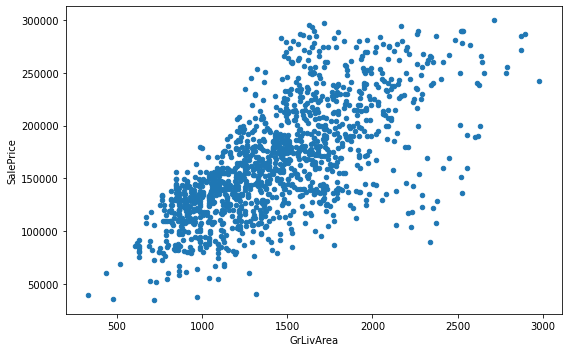

In [0]:
#plotar o gráfico de dispersão.
fog, ax = plt.subplots(figsize= (8,5))
df.plot.scatter(x = "GrLivArea", y= "SalePrice", ax=ax)
plt.tight_layout();

####Regressao Linear Simples com o *scikit-learn*

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [0]:
#Separar a variável dependente (SalePrice) da nossa feature, 
#e usar a função train_test_split para fazer a divisãp entre os dados de treino e teste.

#determinar X e y ...mas atenção com 1-feature (reshape) - variável x (array com 2 dimensões) e y (array com uma dimensão).
X = df["GrLivArea"]
y = df["SalePrice"]

#dividir o dataset entre treino e teste
X_test, X_train, y_test, y_train = train_test_split(X, y)

#criar e treinar um modelo de Regressão Linear

rls_model = LinearRegression()
rls_model.fit(X_train, y_train)

ValueError: ignored

Mais importante que se desesperar é entender o que aconteceu. A mensagem de erro acima é por causa do sklearn.pipeline do pacote. Ela acontece porque passamos apenas uma variável (feature) na variável X. Veja esta parte da mensagem do erro:
...if your data has a single feature or array.reshape(1, -1)
Uma coisa que você deve se lembrar é que o scikit-learn espera duas coisas nesta etapa:
Que a variável X seja sempre um np.array com duas dimensões
Que a variável y seja sempre um np.array com uma dimensão
Olhe os prints abaixo para ver as dimensões de cada variável nossa e ver que não estão de acordo com o que o pacote espera.

In [0]:
# \t signifoca dar ums espaço com tab
print("df:\t\t", df.shape)
print("X:\t\t", X.shape)
print("X (reshape):\t",X.values.reshape(-1,1).shape)
print("y:\t\t", y.shape)

df:		 (1338, 2)
X:		 (1338,)
X (reshape):	 (1338, 1)
y:		 (1338,)


Isso é fácil de resolver. Quando for preciso mudar a dimensão de um array para atender a condição acima, use .reshape(-1,1).


In [0]:
#Separar a variável dependente (SalePrice) da nossa feature, 
#e usar a função train_test_split para fazer a divisãp entre os dados de treino e teste.

#determinar X e y ...mas atenção com 1-feature (reshape) - variável x (array com 2 dimensões) e y (array com uma dimensão).

#TRANSFORMANDO X EM UMA MATRIX BIDIMENSIONAL (ARRAY)
X = df["GrLivArea"].values.reshape(-1,1)
y = df["SalePrice"]

#dividir o dataset entre treino e teste
X_test, X_train, y_test, y_train = train_test_split(X, y)

#criar e treinar um modelo de Regressão Linear

rls_model = LinearRegression()
rls_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# imprimir os coeficientes
print("Coeficiente:\t", rls_model.coef_)
print("Intercepto:\t", rls_model.intercept_)

Coeficiente:	 [81.48209765]
Intercepto:	 47913.15819239829


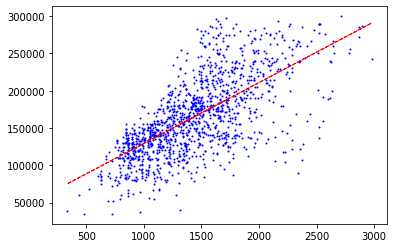

In [0]:
# plotar reta e dados
fig, ax = plt.subplots()
ax.scatter(X, y, s=1, color='blue')
#Equação da reta do modelio
ax.plot(X, (rls_model.coef_ * X + rls_model.intercept_), '--r', linewidth=1)

In [0]:
# previsões em cima do dataset de teste
y_pred = rls_model.predict(X_test)

In [0]:
#valores de predição.
y_pred

array([122224.83125204, 147321.31732919, 189040.15132759, ...,
       178610.44282799, 133632.32492347, 133795.28911878])

In [0]:
# avaliar o desempenho do modelo
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.45295010226504917
MAE:		 28718.237338549912
MSE:		 1433358266.9159212
